# 02 - Kernel methods and SVMs
** Ecole Centrale Nantes **

** Diana Mateus **





PARTICIPANTS: **(Fill in your names)**
XU Zixuan   

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
import random


from skimage.color import rgb2gray
from skimage.transform import resize

from sklearn.svm import SVC
from sklearn.utils import shuffle


# 1. Image classification on Caltech 101

**a)** Download images from
http://www.vision.caltech.edu/feifeili/Datasets.htm
and run the code bellow to check the files and store the name of the classes in the list ```labelNamesAll```

(Just run)

In [2]:
## VERIFY LOCATION AND STORE LABEL NAMES

#IMDIR = '101Caltech/101_ObjectCategories/'
#IMDIR = '101Caltech/animals10classes/'
IMDIR = 'animals10classes'


labelNamesAll = []

for root, dirnames, filenames in os.walk(IMDIR):
    labelNamesAll.append(dirnames)
    #uncomment to check what is found in this folder
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)

labelNamesAll = labelNamesAll[0]

# The list of all labels/directories is
# print(labelNamesAll)

animals10classes\ant\image_0001.jpg
animals10classes\ant\image_0002.jpg
animals10classes\ant\image_0003.jpg
animals10classes\ant\image_0004.jpg
animals10classes\ant\image_0005.jpg
animals10classes\ant\image_0006.jpg
animals10classes\ant\image_0007.jpg
animals10classes\ant\image_0008.jpg
animals10classes\ant\image_0009.jpg
animals10classes\ant\image_0010.jpg
animals10classes\ant\image_0011.jpg
animals10classes\ant\image_0012.jpg
animals10classes\ant\image_0013.jpg
animals10classes\ant\image_0014.jpg
animals10classes\ant\image_0015.jpg
animals10classes\ant\image_0016.jpg
animals10classes\ant\image_0017.jpg
animals10classes\ant\image_0018.jpg
animals10classes\ant\image_0019.jpg
animals10classes\ant\image_0020.jpg
animals10classes\ant\image_0021.jpg
animals10classes\ant\image_0022.jpg
animals10classes\ant\image_0023.jpg
animals10classes\ant\image_0024.jpg
animals10classes\ant\image_0025.jpg
animals10classes\ant\image_0026.jpg
animals10classes\ant\image_0027.jpg
animals10classes\ant\image_0

**b. Build a reduced dataset for accelerating process.** To do so: 
- Consider only up to $K$ randomly drawn categories (start with a binary case)
- Read only up to $N$ images for each class
- Resize the images to $(imWidth*imHeight)$

The dataset should consist of a 
- Input matrix $\mathbf{X}$ of size $(K\cdot N)\times (imWidth\cdot imHeight)$ with one image in every row of the matrix. 
- Output vector $\mathbf{y}$ of size $(K\cdot N)\times 1$ with the label index of each input point in $\bf X$.
- the reduced list of the label names of size $K$ to map between the indices and the names.

**Note than different classes may have different number of images so that the actual number of $\bf X$ and $\bf y$ is less than $K*N$**

(Run and try to understand the structure of the data)

In [3]:
#build DATASET from K categories and (up to) N images from category
K = 4  #2 categories
N = 40  #40 images for each class
imWidth = 100  #width of each image
imHeight = 100  #height of each image

#selection of label indices
X = np.zeros([K*N,imHeight*imWidth]) #data matrix, one image per row, one pixel per column
#Y = np.zeros([K*N,1]) #label indices
Y = -np.ones([K*N,1]) #label indices  #initial labels to -1
labelNames = []

random.seed(a=42)  #use a random seed


globalCount = 0
for i in range(K):   #for each class
    while True:
        lab = random.randint(0,len(labelNamesAll)-1)
        if lab not in labelNames:
            break
    #folders are named after the class label
    filedir = os.path.join(IMDIR,labelNamesAll[lab])
    print(filedir)

    #save the name of the class
    labelNames.append(labelNamesAll[lab])       

    classCount = 0
    for filename in os.listdir(filedir):
        f = os.path.join(filedir, filename)
        if f.endswith(('.jpg')) and (classCount < N):
            #image = skimage.io.imread(f, as_grey=True) #Try this line instead of the one below if there is an error
            image = skimage.io.imread(f, as_gray=True)
            image = skimage.transform.resize(image, [imHeight,imWidth],mode='constant')#,anti_aliasing=True)
            X[globalCount,:] = image.flatten()
            Y[globalCount,:] = i
            globalCount += 1
            classCount += 1

#Remove the unused entries of X and Y
print(globalCount)
X = X[:globalCount,:]
Y = Y[:globalCount,:]

#Check the stored classes
print(labelNames)
print(X.shape)
print(Y.T)
#print(X)


animals10classes\butterfly


E:\ananconda\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


animals10classes\ant
animals10classes\dragonfly
animals10classes\crocodile
160
['butterfly', 'ant', 'dragonfly', 'crocodile']
(160, 10000)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
  3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]


**c**. Split the dataset into train (80% of samples) and test (20% samples). 
(Run and try to understand the structure of the data)

In [4]:
# Split in Train and test set with 80% - 20% rule

Ntrain = np.rint(.8*Y.shape[0]).astype(int)
Ntest = Y.shape[0]-Ntrain
print('Training with', Ntrain , 'training samples and ', Ntest, 'testing samples.')

# Randomize the order of X and Y
X, Y = shuffle(X, Y, random_state=0)


# Split the data and labels into training/testing sets
X_train = X[0:Ntrain,:]
Y_train = Y[0:Ntrain,:]

X_test = X[Ntrain:,:]
Y_test = Y[Ntrain:,:]

print(X_train.shape)
print(X_test.shape)
#print(Y_train)
print(Y_train.T)
print(Y_test.T)

Training with 128 training samples and  32 testing samples.
(128, 10000)
(32, 10000)
[[2. 2. 3. 0. 1. 2. 3. 1. 2. 2. 3. 2. 0. 3. 2. 1. 1. 2. 3. 2. 1. 1. 1. 0.
  0. 0. 3. 1. 2. 3. 3. 0. 1. 2. 0. 1. 3. 0. 1. 3. 1. 0. 1. 3. 2. 3. 3. 0.
  2. 2. 1. 2. 0. 3. 0. 2. 1. 2. 0. 3. 2. 1. 1. 0. 3. 3. 2. 2. 3. 3. 3. 1.
  2. 3. 1. 2. 2. 1. 1. 1. 0. 3. 0. 2. 0. 0. 1. 1. 1. 0. 3. 2. 0. 1. 1. 2.
  3. 0. 3. 0. 3. 2. 3. 1. 0. 2. 0. 1. 1. 3. 1. 0. 3. 3. 1. 2. 0. 3. 0. 2.
  2. 0. 0. 1. 3. 3. 0. 0.]]
[[0. 2. 0. 3. 3. 3. 0. 0. 2. 2. 1. 2. 3. 1. 1. 0. 2. 3. 3. 0. 1. 3. 2. 1.
  2. 0. 0. 0. 2. 1. 2. 1.]]


**d) Training and testing a SVM
- Create an SVC model using the sklearn module, 
- train it on the train set, 
- and test it on the test set**. 

(Fill in the code and answer the questions)

**Question** SVMs are intrinsically binary classifiers, can you train the SVC for K>2? How is that achieved?

**ANSWER**: Fill your answer here



In [5]:
# Create, train and test an svm model using the sklearn SVC
from sklearn.svm import SVC 

#clf_svm = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf_svm = SVC(C=1, kernel='rbf')
clf_svm.fit(X_train, Y_train.ravel())
Y_pred = clf_svm.predict(X_test)
# FILL YOUR CODE HERE 


print("True classes",Y_test.T)
print("Predictions",Y_pred)
errors = np.sum((Y_test.ravel()!=Y_pred))
print('There were ', errors, 'errors')

E:\ananconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


True classes [[0. 2. 0. 3. 3. 3. 0. 0. 2. 2. 1. 2. 3. 1. 1. 0. 2. 3. 3. 0. 1. 3. 2. 1.
  2. 0. 0. 0. 2. 1. 2. 1.]]
Predictions [3. 3. 1. 3. 1. 3. 1. 3. 1. 3. 3. 3. 3. 1. 1. 3. 2. 3. 3. 3. 3. 3. 2. 1.
 3. 3. 3. 3. 3. 1. 3. 3.]
There were  20 errors


In [6]:
# test TP
print(Y_test.ravel())
print(Y_pred)
print(Y_test.ravel() == Y_pred)
print(np.array(Y_test.ravel(), dtype=bool))
FN = np.sum(~(Y_test.ravel() == Y_pred) & ~np.array(Y_test.ravel(), dtype=bool))
print(FN)

[0. 2. 0. 3. 3. 3. 0. 0. 2. 2. 1. 2. 3. 1. 1. 0. 2. 3. 3. 0. 1. 3. 2. 1.
 2. 0. 0. 0. 2. 1. 2. 1.]
[3. 3. 1. 3. 1. 3. 1. 3. 1. 3. 3. 3. 3. 1. 1. 3. 2. 3. 3. 3. 3. 3. 2. 1.
 3. 3. 3. 3. 3. 1. 3. 3.]
[False False False  True False  True False False False False False False
  True  True  True False  True  True  True False False  True  True  True
 False False False False False  True False False]
[False  True False  True  True  True False False  True  True  True  True
  True  True  True False  True  True  True False  True  True  True  True
  True False False False  True  True  True  True]
9


**e) Fill in the functions bellow to computing different evaluation measures and give a performance report**
Look at the formulas and definitions in https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)

Start by computing the confusion matrix, and the values TP, TN, FP, FN, for a binary case. When considering multiple clases ($K>2$) treat one class at a time as the postive class, and the remaining classes as negative. You may want to indicate the positive class as a parameter to the indicator function.

**Question:** There are two ways of resuming the scores for a multiple class problem $K>2$, namely, the macroaverage and the microaverage. Implement and EXPLAIN them below.

MACROAVERGING
    We can build multipule confusion matrix, one for each class. Then we can use TP, TN, FP, FN for each class to calculate the accuracy.   Then, we take the mean of them.
 
MICROAVERGING
    We do not consider the specific element in each class and we just mark them as right prediction and wrong prediction. The total accuracy will be (number of right predictions) / (number of total predictions)

**Hint** Add a numerical zero eps to the denominators to prevent dividing by zero

**ANSWER** Write your answer in the report

In [7]:
# Functions to compute the errors between prediction and ground truth 

def compute_measures(Y_gt,Y_pred1, positiveClass=1): #Y_gt = ground truth
    #check i=original Y_gt and Y_pred
    '''
    print('original')
    print('Y_gt:', Y_gt)
    print('Y_pred1', Y_pred1)
    print('positiveClass =', positiveClass)
    print('====================',positiveClass)
    print(Y_test.ravel())
    print(Y_pred)
    '''
    '''
    for i in range(len(Y_gt)):
        if Y_gt[i] == positiveClass:
            print(i,'-',Y_gt[i])
            Y_gt[i] = 1
        else:  
            Y_gt[i] = 0
    for i in range(len(Y_pred1)):
        if Y_pred1[i] == positiveClass:
            Y_pred1[i] = 1
        else:
            Y_pred1[i] = 0
    '''
    Y_gt = np.where(Y_gt==positiveClass, 1.0, 0)
    Y_pred1 = np.where(Y_pred1==positiveClass, 1.0, 0)
    #check Y_gt and Y_pred1
    '''
    print('changed')
    print('Y_gt:', Y_gt)
    print('Y_pred1', Y_pred1)
    '''
    measures = dict()
    Y_len = len(Y_gt)
    
    eps = 1e-12
    
    # True positives TP
    TP = np.sum((Y_gt == Y_pred1) & np.array(Y_gt, dtype=bool))
        
    # True negatives TN
    TN = np.sum((Y_gt == Y_pred1) & ~np.array(Y_gt, dtype=bool))
    
    # False positives FP
    FP = np.sum(~(Y_gt == Y_pred1) & ~np.array(Y_gt, dtype=bool))
        
    # False negatives FN
    FN = np.sum(~(Y_gt == Y_pred1) & np.array(Y_gt, dtype=bool))

    print('TP ', TP, 'TN ', TN, 'FP', FP, 'FN', FN, 'Total', TP+TN+FP+FN)
    measures['TP'] = TP
    measures['TN'] = TN
    measures['FP'] = FP
    measures['FN'] = FN
    
    
    # Accuracy
    if TN+FP+FN+TP==0:
        measures['accuracy'] = (TP+TN)/eps
    else:
        measures['accuracy'] = (TP+TN)/(TN+FP+FN+TP)
    
    # Precision
    if TP+FP==0:
        measures['precision'] =TP/eps
    else:
        measures['precision'] =TP/(TP+FP)
        
    # Specificity
    if FP+TN==0:
        measures['specificity'] = TN/eps
    else:
        measures['specificity']= TN/(FP+TN)
    
    # Recall
    if (TP+FN)==0:
        measures['recall'] = TP/eps
    else:
        measures['recall'] = TP/(TP+FN)
    
    # F-measure
    measures['f1'] = 2*TP/(2*TP+FP+FN)
    
    # Negative Predictive Value
    if TN+FN==0:
        measures['npv'] = TN/eps
    else:
        measures['npv'] = TN/(TN+FN)
    
    # False Predictive Value
    if FP+TN==0:
        measures['fpr']=FP/eps
    else:
        measures['fpr'] = FP/(FP+TN)
    
    print('Accuracy ', measures['accuracy'], '\n',
          'Precision', measures['precision'], '\n',
          'Recall', measures['recall'], '\n',
          'Specificity ', measures['specificity'], '\n',
          'F-measure', measures['f1'], '\n',
          'NPV', measures['npv'],'\n',
          'FPV', measures['fpr'],'\n')
    

    return measures

def micro_average(measuresList):
    microAverage = dict()
    eps = 1e-12
    
    TP = np.zeros(len(measuresList))
    TN = np.zeros(len(measuresList))
    FP = np.zeros(len(measuresList))
    FN = np.zeros(len(measuresList))  
    for i in range(len(measuresList)):
        # True positives TP
        TP[i] = measuresList[i]['TP']

        # True negatives TN
        TN[i] = measuresList[i]['TN']

        # False positives FP
        FP[i] = measuresList[i]['FP']

        # False negatives FN
        FN[i] = measuresList[i]['FN']
    sum_TP=np.sum(TP)
    sum_TN=np.sum(TN)
    sum_FP=np.sum(FP)
    sum_FN=np.sum(FN)
    
    print('sum_TP ', sum_TP, 'sum_TN ', sum_TN, 'sum_FP', sum_FP, 'sum_FN', sum_FN, 'sum_Total', sum_TP+sum_TN+sum_FP+sum_FN)
    microAverage['TP'] = sum_TP
    microAverage['TN'] = sum_TN
    microAverage['FP'] = sum_FP
    microAverage['FN'] = sum_FN 
    
    
    # Accuracy
    if sum_TN+sum_FP+sum_FN+sum_TP==0:
        microAverage['accuracy'] = (sum_TP+sum_TN)/eps
    else:
        microAverage['accuracy'] = (sum_TP+sum_TN)/(sum_TN+sum_FP+sum_FN+sum_TP)
      
    # Precision
    if sum_TP+sum_FP==0:
        microAverage['precision'] = sum_TP/eps
    else:
        microAverage['precision'] = sum_TP/(sum_TP+sum_FP)
        
    # Specificity
    if sum_FP+sum_TN==0:
        microAverage['specificity'] = sum_TN/eps
    else:
        microAverage['specificity']= sum_TN/(sum_FP+sum_TN)
    
    # Recall
    if sum_TP+sum_FN==0:
        microAverage['recall'] = sum_TP/eps
    else:
        microAverage['recall'] = sum_TP/(sum_TP+sum_FN)
    
    # F-measure
    microAverage['f1'] = (2*microAverage['precision']*microAverage['recall'])/(microAverage['precision']+microAverage['recall'])
    
    # Negative Predictive Value
    if sum_TN+sum_FN==0:
        microAverage['npv'] = sum_TN/eps
    else:
        microAverage['npv'] = sum_TN/(sum_TN+sum_FN)
    
    # False Predictive Value
    if sum_FP+sum_TN==0:
        microAverage['fpr']=sum_FP/eps
    else:
        microAverage['fpr'] = sum_FP/(sum_FP+sum_TN)
    
        
    print('Accuracy ', microAverage['accuracy'], '\n',
          'Precision', microAverage['precision'], '\n',
          'Recall', microAverage['recall'], '\n',
          'Specificity ', microAverage['specificity'], '\n',
          'F-measure', microAverage['f1'], '\n',
          'NPV', microAverage['npv'],'\n',
          'FPV', microAverage['fpr'],'\n')
    
    return microAverage

def macro_average(measuresList):
    macroAverage = dict()

    # Accuracy
    accu=np.zeros(len(measuresList))
    for i in range(len(measuresList)):
        accu[i]=measuresList[i]['accuracy']
    macroAverage['accuracy'] = np.mean(accu)
    
    # Precision
    prec=np.zeros(len(measuresList))
    for i in range(len(measuresList)):
        prec[i]=measuresList[i]['precision']
    macroAverage['precision'] = np.mean(prec)
        
    # Specificity
    spec=np.zeros(len(measuresList))
    for i in range(len(measuresList)):
        spec[i]=measuresList[i]['specificity']
    macroAverage['specificity'] = np.mean(spec)
    
    # Recall
    reca=np.zeros(len(measuresList))
    for i in range(len(measuresList)):
        reca[i]=measuresList[i]['recall']
    macroAverage['recall'] = np.mean(reca)
    
    # F-measure
    f1=np.zeros(len(measuresList))
    for i in range(len(measuresList)):
        f1[i]=measuresList[i]['f1']
    macroAverage['f1'] = np.mean(f1)
    
    # Negative Predictive Value
    npv=np.zeros(len(measuresList))
    for i in range(len(measuresList)):
        npv[i]=measuresList[i]['npv']
    macroAverage['npv'] = np.mean(npv)
    
    # False Predictive Value
    fpr=np.zeros(len(measuresList))
    for i in range(len(measuresList)):
        fpr[i]=measuresList[i]['fpr']
    macroAverage['fpr'] = np.mean(fpr)
    
    print('Accuracy ', macroAverage['accuracy'], '\n',
          'Precision', macroAverage['precision'], '\n',
          'Recall', macroAverage['recall'], '\n',
          'Specificity ', macroAverage['specificity'], '\n',
          'F-measure', macroAverage['f1'], '\n',
          'NPV', macroAverage['npv'],'\n',
          'FPV', macroAverage['fpr'],'\n')
    
    return macroAverage



**e)** Measure the performance of the SVC model for multiple classes $K>2$

First collect the measures when considering each class as positive, then, compute macro and microaverage 

Compare your results to those of sklearn metrics. 

In [8]:
#Fill in a list of measure dictionaries taking as input a different positive class

multiclass = []
'''
print(Y_test.ravel())
print(Y_pred)
print('===========================================')
'''
for k in range(K):
    print('For class',labelNames[k])
    multiclass.append(compute_measures(Y_test.ravel(),Y_pred, positiveClass=k))
    #multiclass.append(compute_measures(Y_gt,Y_pred1, positiveClass=k))
    '''
    print('====================',k)
    print(Y_test.ravel())
    print(Y_pred)
    '''
# print('multiclass', multiclass)

print('Macro-average')
macro_average(multiclass)
    
print('Micro-average')
micro_average(multiclass)


from sklearn.metrics import classification_report #confusion_matrix, accuracy_score, precision_score, recall_score, f1_micro, f1_macro
print(classification_report(Y_test.ravel(), Y_pred, target_names=labelNames))

For class butterfly
TP  0 TN  23 FP 0 FN 9 Total 32
Accuracy  0.71875 
 Precision 0.0 
 Recall 0.0 
 Specificity  1.0 
 F-measure 0.0 
 NPV 0.71875 
 FPV 0.0 

For class ant
TP  4 TN  21 FP 4 FN 3 Total 32
Accuracy  0.78125 
 Precision 0.5 
 Recall 0.5714285714285714 
 Specificity  0.84 
 F-measure 0.5333333333333333 
 NPV 0.875 
 FPV 0.16 

For class dragonfly
TP  2 TN  23 FP 0 FN 7 Total 32
Accuracy  0.78125 
 Precision 1.0 
 Recall 0.2222222222222222 
 Specificity  1.0 
 F-measure 0.36363636363636365 
 NPV 0.7666666666666667 
 FPV 0.0 

For class crocodile
TP  6 TN  9 FP 16 FN 1 Total 32
Accuracy  0.46875 
 Precision 0.2727272727272727 
 Recall 0.8571428571428571 
 Specificity  0.36 
 F-measure 0.41379310344827586 
 NPV 0.9 
 FPV 0.64 

Macro-average
Accuracy  0.6875 
 Precision 0.4431818181818182 
 Recall 0.4126984126984127 
 Specificity  0.7999999999999999 
 F-measure 0.3276907001044932 
 NPV 0.8151041666666666 
 FPV 0.2 

Micro-average
sum_TP  12.0 sum_TN  76.0 sum_FP 20.0 sum_FN

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**f) Show the test images as well as the the predictions (Y_pred) vs the ground truth (Y_gt) labels for the best model**
(Just run for each analysed model)

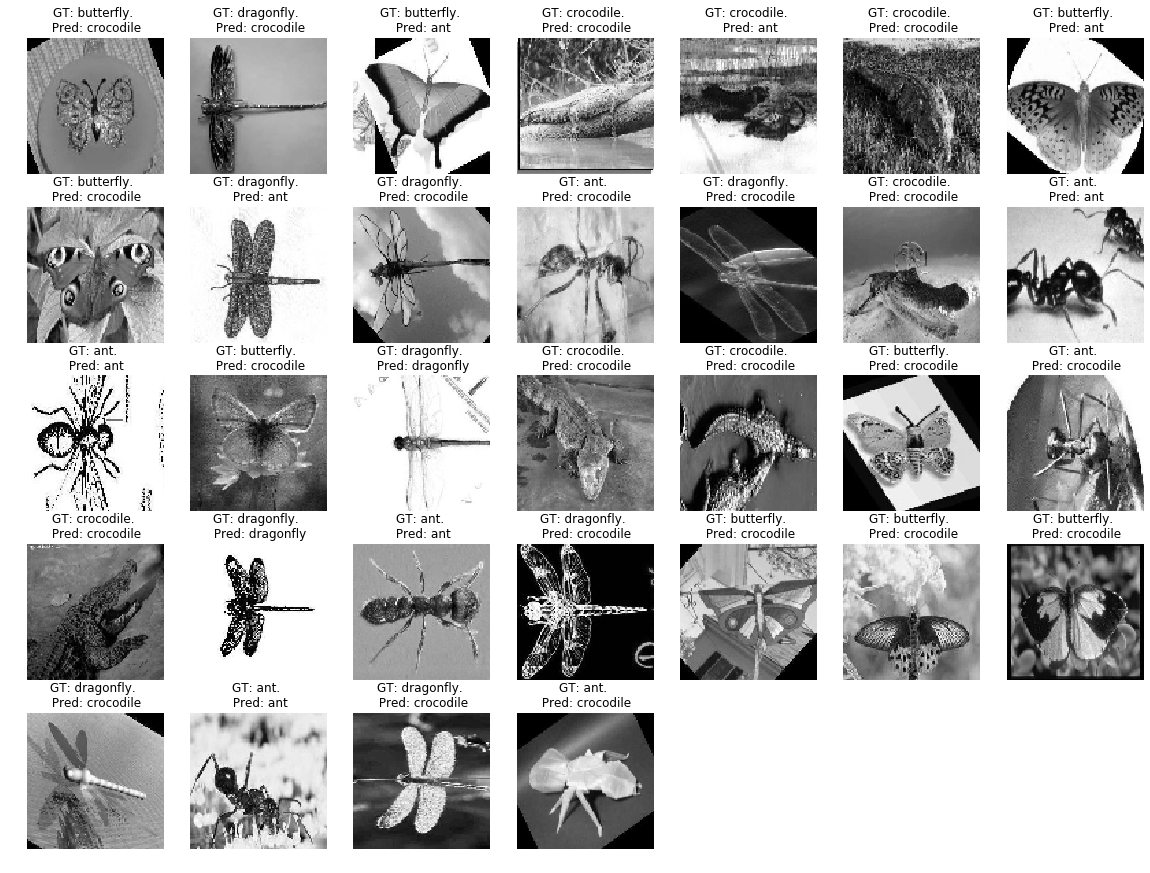

In [9]:
# Show some results
width=20
height=15
plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure()
imCounter = 1
for i in range(len(Y_test)):
    image=np.reshape(X_test[i,:], (imHeight,imWidth)) 

    plt.subplot(5,7,imCounter)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    gtLabel = labelNames[Y_test.ravel()[i].astype(int)]
    predLabel = labelNames[Y_pred.ravel()[i].astype(int)]
    plt.title('GT: {}. \n Pred: {}'.format(gtLabel, predLabel))

    imCounter += 1
plt.show()


** g) REPORT:**  Change the kernel and other hyperparameters of your SVC trying to optimize the F1 measure for different cases. Describe in your report the different variants of the model tried. You may want to split your dataset into train, validation and test sets. Present and discuss your findings for different hyperparameters, number of classes and numbers of images. THIS IS THE MOST IMPORTANT PART FOR THE EVALUATION. 

In [10]:
# Preprocessing
# First split it into data and validation data
print('We have',Y.shape[0],'data')
Nval = np.rint(.2*Y.shape[0]).astype(int)
Ndata = Y.shape[0]-Nval
print('Data set with', Ndata , 'Validation Data set', Nval)

X, Y = shuffle(X, Y, random_state=0)


# Split the data and labels into training/testing sets
X_val = X[0:Nval,:]
Y_val = Y[0:Nval,:]

X_data = X[Nval:,:]
Y_data = Y[Nval:,:]


# Split in Train and test set with 80% - 20% rule
Ntrain = np.rint(.8*Y_data.shape[0]).astype(int)
Ntest = Y_data.shape[0]-Ntrain
print('Training with', Ntrain , 'training samples and ', Ntest, 'testing samples.')

# Randomize the order of X and Y
X_data, Y_data = shuffle(X_data, Y_data, random_state=0)


# Split the data and labels into training/testing sets
X_train = X_data[0:Ntrain,:]
Y_train = Y_data[0:Ntrain,:]

X_test = X_data[Ntrain:,:]
Y_test = Y_data[Ntrain:,:]

print(Y_train.T)
print(Y_test.T)
print(Y_val.T)

We have 160 data
Data set with 128 Validation Data set 32
Training with 102 training samples and  26 testing samples.
[[3. 3. 2. 3. 1. 0. 0. 2. 3. 2. 3. 0. 1. 2. 1. 0. 2. 1. 0. 3. 3. 3. 3. 3.
  3. 1. 3. 0. 2. 1. 3. 0. 0. 0. 1. 0. 0. 3. 1. 0. 2. 0. 1. 1. 2. 0. 1. 1.
  2. 2. 2. 0. 1. 1. 2. 0. 1. 3. 0. 2. 3. 1. 3. 1. 3. 2. 3. 1. 1. 0. 3. 0.
  3. 2. 0. 0. 1. 1. 3. 3. 0. 0. 2. 1. 2. 2. 1. 3. 3. 2. 0. 1. 1. 3. 2. 2.
  0. 3. 1. 2. 2. 1.]]
[[3. 1. 3. 2. 3. 1. 1. 0. 1. 0. 2. 0. 2. 0. 2. 2. 1. 2. 1. 3. 2. 2. 2. 3.
  2. 1.]]
[[1. 3. 0. 1. 2. 2. 0. 2. 0. 1. 3. 0. 3. 3. 2. 1. 2. 0. 0. 3. 3. 1. 3. 2.
  0. 2. 0. 1. 3. 0. 0. 0.]]


In [11]:
def chooseClassNumbers(K = 3,N = 40):
    # Change the number of class and the number of image
    # K = 4  # categories
    # N = 40  # images for each class


    #build DATASET from K categories and (up to) N images from category
    imWidth = 100  #width of each image
    imHeight = 100  #height of each image

    #selection of label indices
    X = np.zeros([K*N,imHeight*imWidth]) #data matrix, one image per row, one pixel per column
    #Y = np.zeros([K*N,1]) #label indices
    Y = -np.ones([K*N,1]) #label indices  #initial labels to -1
    labelNames = []

    random.seed(a=42)  #use a random seed


    globalCount = 0
    for i in range(K):   #for each class
        while True:
            lab = random.randint(0,len(labelNamesAll)-1)
            if lab not in labelNames:
                break
        #folders are named after the class label
        filedir = os.path.join(IMDIR,labelNamesAll[lab])
        # print(filedir)

        #save the name of the class
        labelNames.append(labelNamesAll[lab])       

        classCount = 0
        for filename in os.listdir(filedir):
            f = os.path.join(filedir, filename)
            if f.endswith(('.jpg')) and (classCount < N):
                #image = skimage.io.imread(f, as_grey=True) #Try this line instead of the one below if there is an error
                image = skimage.io.imread(f, as_gray=True)
                image = skimage.transform.resize(image, [imHeight,imWidth],mode='constant')#,anti_aliasing=True)
                X[globalCount,:] = image.flatten()
                Y[globalCount,:] = i
                globalCount += 1
                classCount += 1

    #Remove the unused entries of X and Y
    #　print(globalCount)
    X = X[:globalCount,:]
    Y = Y[:globalCount,:]

    #Check the stored classes
    print(labelNames)
    # print(X.shape)
    # print(Y.T)
    #print(X)

    # Split in Train and test set with 80% - 20% rule

    Ntrain = np.rint(.8*Y.shape[0]).astype(int)
    Ntest = Y.shape[0]-Ntrain
    print('Training with', Ntrain , 'training samples and ', Ntest, 'testing samples.')

    # Randomize the order of X and Y
    X, Y = shuffle(X, Y, random_state=0)


    # Split the data and labels into training/testing sets
    X_train = X[0:Ntrain,:]
    Y_train = Y[0:Ntrain,:]

    X_test = X[Ntrain:,:]
    Y_test = Y[Ntrain:,:]
    
    
    print('We choose', K, 'classes with', Y.shape[0], 'images')

    # print(X_train.shape)
    # print(X_test.shape)
    # print(Y_train)
    # print(Y_train.T)
    # print(Y_test.T)
    return X,Y



In [12]:
X,Y = chooseClassNumbers(7,45)

E:\ananconda\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


['butterfly', 'ant', 'dragonfly', 'crocodile', 'crocodile', 'crayfish', 'butterfly']
Training with 250 training samples and  62 testing samples.
We choose 7 classes with 312 images


In [13]:
from sklearn.model_selection import cross_val_score

def chooseC(clist):
    f1_score = []
    for c_ in clist:
        test_svm = SVC(C=c_, kernel='rbf',gamma='auto',tol=1e-8)
        score = cross_val_score(test_svm, X, Y, cv=5, scoring='f1_macro').mean()
        f1_score.append(score)
    return f1_score

In [14]:
def chooseKernel(kernel_list):
    f1_score = []
    for i in kernel_list:
        test_svm = SVC(C=1, kernel=i, gamma='auto', tol=1e-8)
        score = cross_val_score(test_svm, X, Y, cv=5, scoring='f1_macro').mean()
        f1_score.append(score)
    return f1_score

In [15]:
def plot_bar(label_list, num_list1, string=''):
    x = range(len(num_list1))

    rects1 = plt.bar(x, height=num_list1, width=0.4, alpha=0.8, color='green', label="f1 score")

    plt.xticks([index for index in x], label_list)
    plt.title(string)
    plt.legend()
    
    for rect in rects1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height, 3)), ha="center", va="bottom")

In [16]:
# Example
K = 8
N = 10

X, Y = chooseClassNumbers(K, N)


['butterfly', 'ant', 'dragonfly', 'crocodile', 'crocodile', 'crayfish', 'butterfly', 'sea_horse']
Training with 64 training samples and  16 testing samples.
We choose 8 classes with 80 images


In [17]:
# Choose C
clist = np.arange(0.1, 40, 0.5)
f1_score_c = chooseC(clist)


E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\s

E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\c

The best F1 score is 0.21416666666666667 with C= 18.6


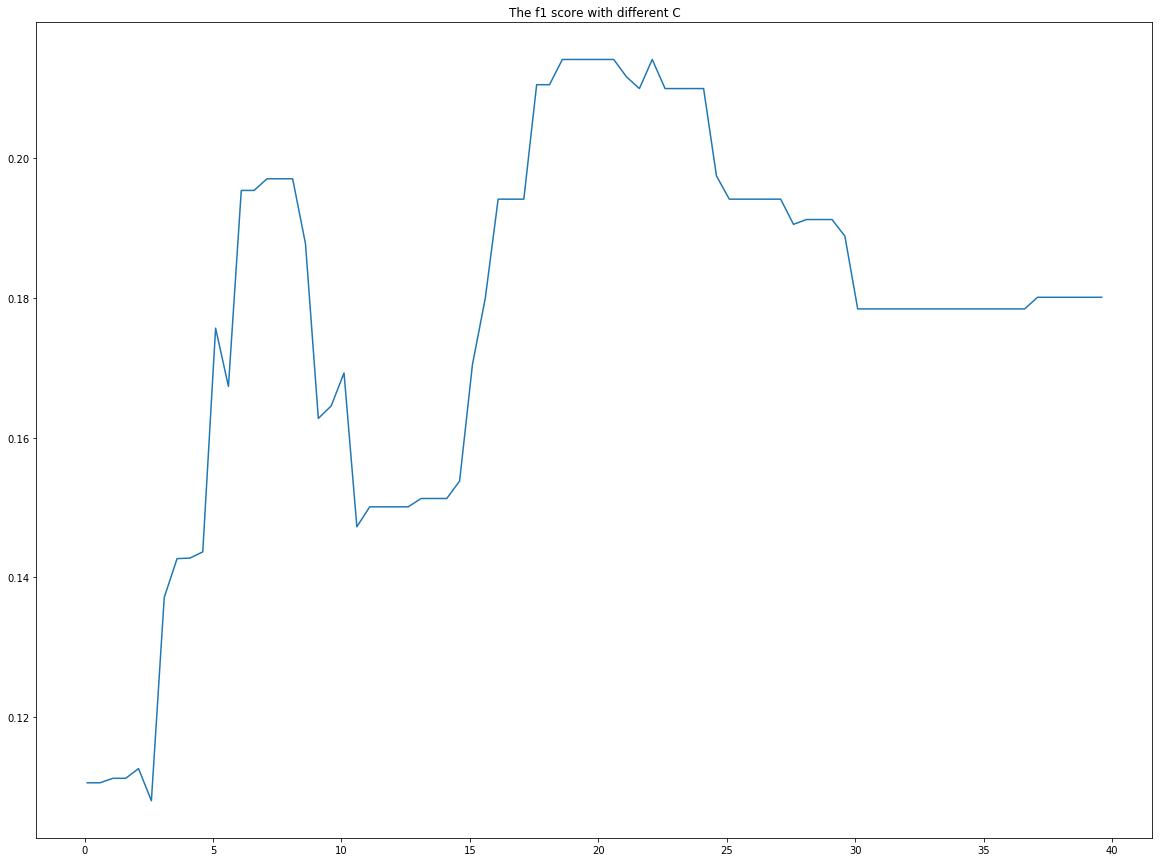

In [18]:
# print(f1_score_c)
c_max = clist[np.argmax(f1_score_c)]
print('The best F1 score is',np.max(f1_score_c) , 'with C=', c_max)
plt.plot(clist, f1_score_c)
plt.title('The f1 score with different C')
plt.show()

In [19]:
# Choose kernel
kernel_list = ["linear","poly","rbf","sigmoid"]
f1_score_kernel = chooseKernel(kernel_list)

E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\ananconda\lib\site-packages\sklearn\utils\val

E:\ananconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The best F1 score is 0.1738690476190476 with kernel =  linear


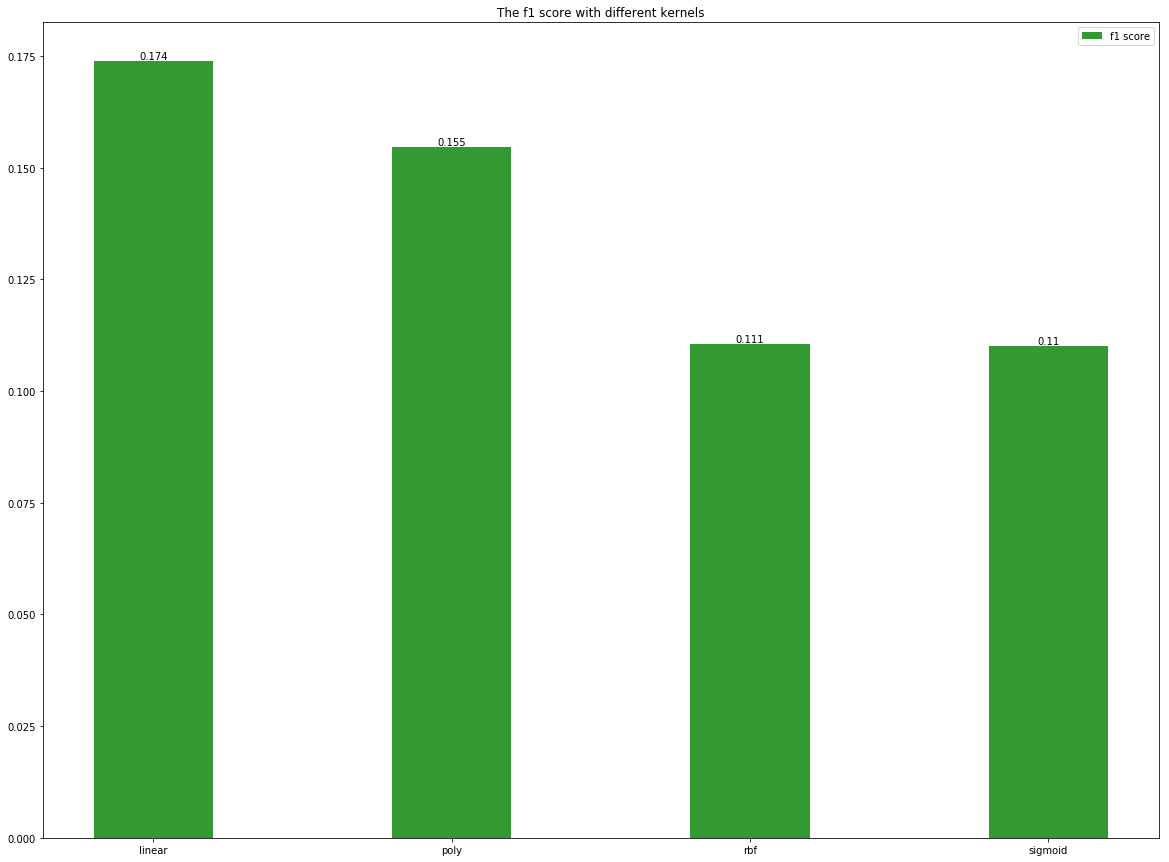

In [20]:
plot_bar(kernel_list, f1_score_kernel, string='The f1 score with different kernels')
kernel_max = kernel_list[np.argmax(f1_score_kernel)]
print('The best F1 score is',np.max(f1_score_kernel) , 'with kernel = ', kernel_max)

In [21]:
def chooseG(g_list):
    f1_score = []
    for i in g_list:
        test_svm = SVC(C=36.6, kernel='rbf', gamma=i, tol=1e-8)
        score = cross_val_score(test_svm, X, Y, cv=5, scoring='f1_macro').mean()
        f1_score.append(score)
    return f1_score

In [22]:
# Choose gamma
glist = np.arange(0.001, 1, 0.001)
f1_score_g = chooseG(glist)

In [23]:
# print(f1_score_c)
g_max = glist[np.argmax(f1_score_g)]
print('The best F1 score is',np.max(f1_score_g) , 'with gamma=', g_max)
plt.plot(glist, f1_score_g)
plt.title('The f1 score with different gamma')
plt.show()

NameError: name 'f1_score_g' is not defined